In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xtrain = pd.read_csv("train.csv")
xtrain.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
xtrain.shape

(595212, 59)

In [4]:
ytrain = xtrain["target"]
idtrain = xtrain["id"]
xtrain.drop(["id", "target"], axis = 1, inplace = True)
xtrain.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


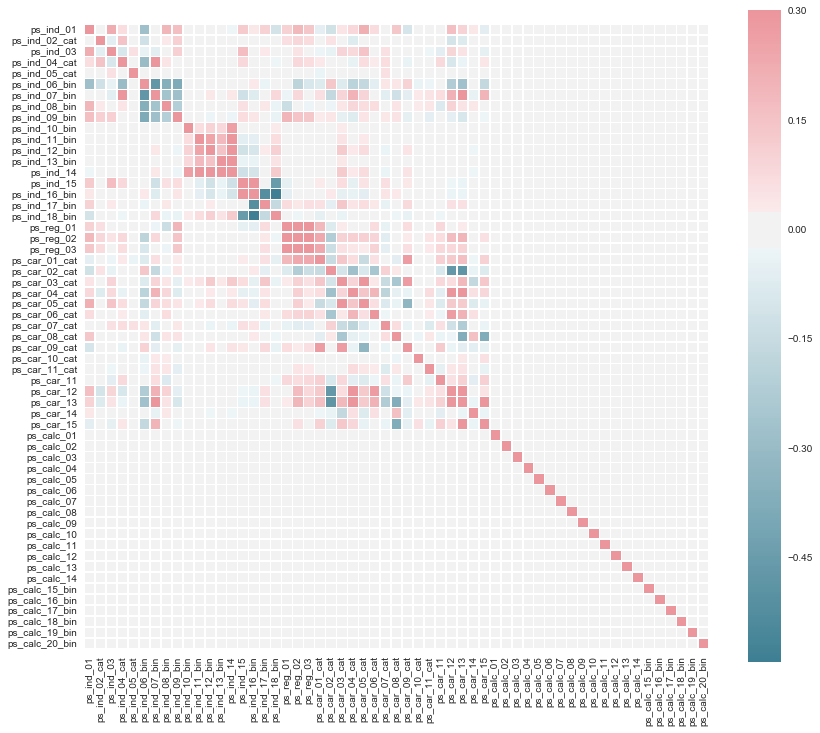

In [5]:
plt.figure(figsize=(14,12))
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(xtrain.corr(), cmap = cmap, vmax=.3, center=0, square = True,linewidths=.5)
plt.show()

In [6]:
xtest = pd.read_csv("test.csv")
xtest.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [7]:
idtest = xtest["id"]
xtest.drop("id", axis = 1, inplace = True)

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
tt = {x:y for x,y in zip(xtrain.columns, clf.feature_importances_) if y >0.025}

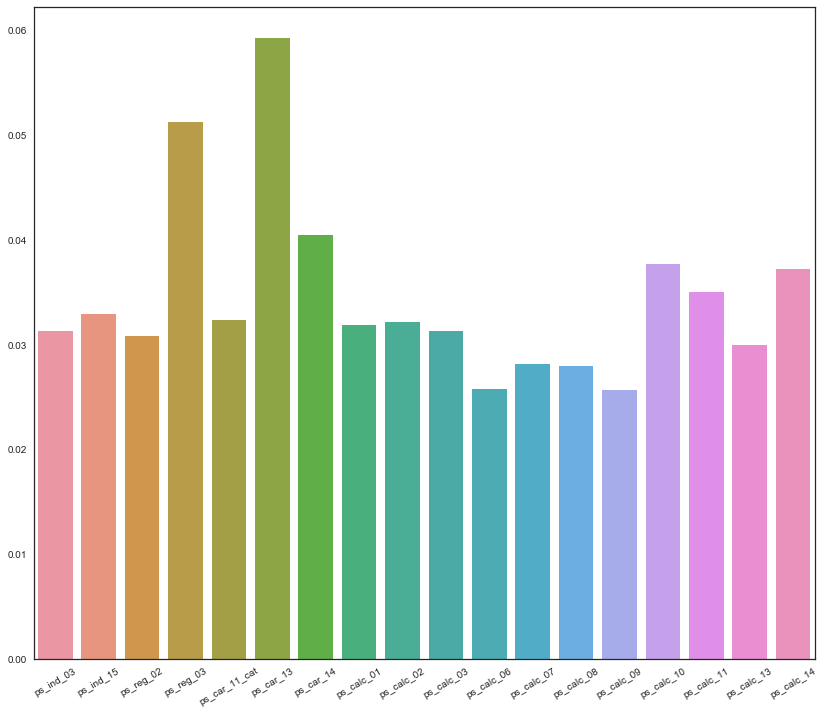

In [11]:
plt.figure(figsize=(14,12))
g = sns.barplot(x = [i for i in tt.keys()], y =[t for t in tt.values()] )
g.set_xticklabels(labels = tt.keys(), rotation=30)
plt.show()

#### PCA

In [12]:
from sklearn.decomposition import PCA, FastICA, TruncatedSVD

In [13]:
pca = PCA(n_components=12, random_state=420)
pca2_results_train = pca.fit_transform(xtrain)
pca2_results_test = pca.transform(xtest)


In [14]:
pca.explained_variance_ratio_

array([ 0.9077327 ,  0.02542341,  0.01103373,  0.00702688,  0.00628342,
        0.00611975,  0.00535865,  0.00453274,  0.00362931,  0.00294262,
        0.00239246,  0.00177461])

#### One hot encoding

In [15]:
total = pd.concat([xtrain, xtest], axis=0)
print('initial shape: {}'.format(total.shape))

for i in total.columns:
    if "cat" in i:
        total[i] = total[i].astype("category")

# binary indexes for train/test set split
#is_train = ~total.y.isnull()

#total = total.filter(items=['ID', 'X0'])
# find all categorical features
cf = total.select_dtypes(include=['category']).columns

#print(cf)

# make one-hot-encoding convenient way - pandas.get_dummies(df) function
dummies = pd.get_dummies(total[cf])  # you can set it = True to ommit multicollinearity (crucial for linear models)


print('oh-encoded shape: {}'.format(dummies.shape))

# get rid of old columns and append them encoded
total = pd.concat(
    [
        total.drop(cf, axis=1),  # drop old
        dummies  # append them one-hot-encoded
    ],
    axis=1  # column-wise
)

print('appended-encoded shape: {}'.format(total.shape))

initial shape: (1488028, 57)
oh-encoded shape: (1488028, 184)
appended-encoded shape: (1488028, 227)


In [16]:
ytrain.astype("category")
print("done")

done


In [17]:
from xgboost import XGBClassifier

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
xgb = XGBClassifier(n_estimators=500,max_depth=6,
                        objective="binary:logistic",
                        learning_rate=0.07, 
                        subsample=1, 
                        colsample_bytree=.5,
                        scale_pos_weight=1.7,
                        reg_alpha=0.5,
                        reg_lambda=1
                     )

In [19]:
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.07, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0.5, reg_lambda=1,
       scale_pos_weight=1.7, seed=0, silent=True, subsample=1)

In [20]:
targ = xgb.predict_proba(xtest)

In [21]:
frame = pd.DataFrame()

In [22]:
frame["id"] = idtest

In [23]:
frame["target"] = targ[:, 0]

In [24]:
frame.head()

,id,target
0,0,0.954938
1,1,0.936738
2,2,0.958834
3,3,0.976370
4,4,0.949576


In [25]:
frame.to_csv("one_hot_encoding_xgb", index=False)